# A calculation of the order of convergence when the limit value is unknown

## _This problem is an optional extension of the previous exercise sheets_

<span style="color:green">JMS</span>.

<span style="color:yellow">optional, You almost got it! </span>.

Assume we have determined numerically an approximate value $f_{\Delta x}$ of a function (for example, of a derivative) using a numerical mesh with grid cells $\Delta x$. We say that a numerical approximation converges toward a limit value $f_{lim}$ with $m$-order approximation if we can write to leading order for all $\Delta x$ which are sufficiently small.

$$f_{\Delta x} = f_{lim} + A(\Delta x)^m  \tag{1}$$

with $A$ a constant. If the global domain in $x$ has length $L$ and has been divided into $N$ intervals (so that  $\Delta x = L/N$), then we have:

$$f_N = f_{lim} + A\left(\frac{L}{N}\right)^m  \tag{2}$$

From there it is straightforward to obtain:

$$\frac{f_{4N}-f_{2N}}{f_{2N}-f_{N}} = \frac{4^{m}-2^{m}}{2^{m}-1} = 2^{m}  \tag{3}$$

or, in other words,

$$m = \log\left(\frac{f_{4N}-f_{2N}}{f_{2N}-f_{N}}\right)/\log2  \tag{4}$$

with log the natural logarithm. Thus, if we obtain a numerical value for a function at a given point with increasing order of approximation using $N$, $2N$, and $4N$ intervals in a given domain, we can calculate the order $m$ of the approximation using Eq. (4) without having to know in advance the exact analytical limit value. Test this method with `np.deriv_cent` and `np.deriv_4tho` and fill in `nm.order_conv`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from nm_lib import nm_lib as nm

In [5]:
## Define intervals 
nint = 64         # Number of intervals 
nump = nint + 1   # Number of points 
x0   = -4.0 
xf   = 10.0

def h(x): 
    r""" 
    Solves the function h(x) from equation 1) 

    Parameters
    ----------
    x : `array`
       Spatial axis. 
       
    Returns
    ------- 
    `array`
        Spatial evolution of the function h(x) 
    """
    return np.cos(np.pi*(x-1) / 2) * np.exp(-((x-3) / 2.5)**2)

nump =128
xx1   = np.arange(nump)/(nump-1.0) * (xf-x0) + x0
hh = nm.deriv_dnw(xx1, h(xx1))[:-1] 

nump =128*2
xx2   = np.arange(nump)/(nump-1.0) * (xf-x0) + x0
hh2 = nm.deriv_dnw(xx2, h(xx2))[:-1]

nump =128*4
xx4   = np.arange(nump)/(nump-1.0) * (xf-x0) + x0
hh4 = nm.deriv_dnw(xx4, h(xx4))[:-1]

In [9]:
conv = nm.order_conv(hh, hh2, hh4) # Rrturns the order of convergence 
conv_cent = nm.deriv_cent(xx1, hh)
conv_4tho = nm.deriv_4tho(xx1, hh)

(127,) (128,) (128,)


AttributeError: module 'numpy' has no attribute 'deriv_cent'

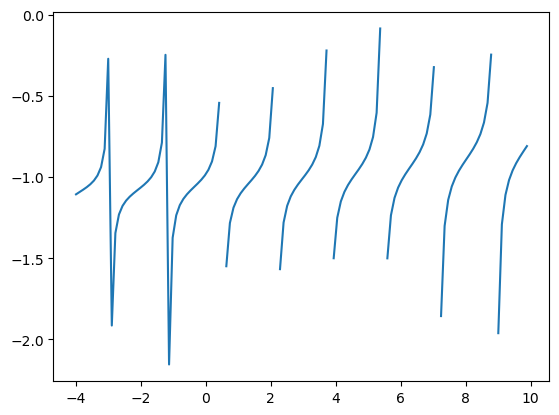

In [8]:
# plot xx against nm.order_conv 
plt.plot(xx1[:-1], conv)
plt.plot(xx1[:-1], conv_cent)
plt.plot(xx1[:-1], conv_4tho)